# Preprocess Data
- Plot the data.
- Make the data balanced by undersampling.
- Adding some samples manually
- Dump to huggingface datasets.

Dataset: https://huggingface.co/datasets/AlekseyDorkin/extended_tweet_emojis/tree/main


## 1. Install Dependencies

In [2]:
# you might want to restart the kernel after installation is complete.
!pip install datasets jupyter ipywidgets jupyter_client --upgrade --quiet

## 2. Load Data

In [3]:
from datasets import load_dataset, Dataset

dataset = load_dataset("AlekseyDorkin/extended_tweet_emojis")
df_train = dataset["train"].to_pandas()
df_val = dataset["validation"].to_pandas()

Using custom data configuration AlekseyDorkin--extended_tweet_emojis-9d4b19d0fde1050c
Reusing dataset parquet (/root/.cache/huggingface/datasets/AlekseyDorkin___parquet/AlekseyDorkin--extended_tweet_emojis-9d4b19d0fde1050c/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/2 [00:00<?, ?it/s]

## 3. Plot Data

In [4]:
import matplotlib.pyplot as plt

def plot(df):
    df["label"].value_counts().plot(kind = 'bar')

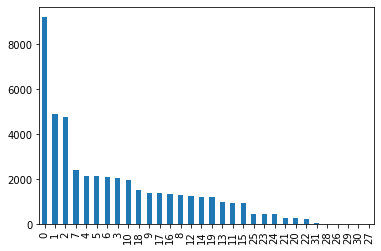

In [5]:
plot(df_train)


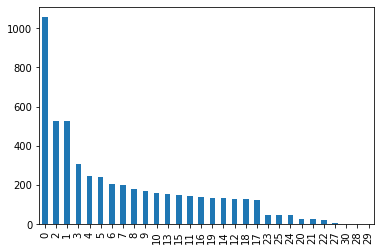

In [6]:
plot(df_val)

In [7]:
df_train.label.value_counts()

0     9225
1     4921
2     4788
7     2420
4     2156
5     2143
6     2079
3     2047
10    1982
18    1510
9     1398
17    1397
16    1354
8     1289
12    1247
14    1225
19    1192
13     980
11     946
15     934
25     454
23     446
24     430
21     270
20     263
22     245
31      30
28      17
26      13
29      12
30      12
27      11
Name: label, dtype: int64

## 4. Undersample

In [8]:
def under_sample(df, max_no_rows=None):
    if max_no_rows is None:
        max_no_rows = min([x[1].shape[0] for x in df.groupby("label")])
    print(f"max no of rows: {max_no_rows}")
    
    def _under_sample(x):
        # do not undersample if we have less than
        if x.shape[0] > max_no_rows:
            return x.sample(n=max_no_rows, replace=False, axis=0)
        return x
    
    df = df.groupby("label", as_index=False).apply(lambda x: _under_sample(x)).reset_index(drop=True)
    plot(df)
    return df


max no of rows: 500


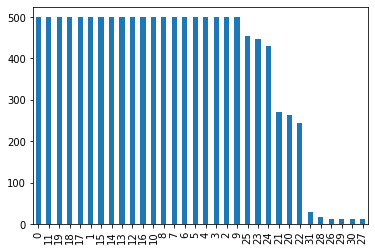

In [9]:
df_train_undersample = under_sample(df_train, max_no_rows=500)

In [10]:
df_train_undersample.label.value_counts()

0     500
11    500
19    500
18    500
17    500
1     500
15    500
14    500
13    500
12    500
16    500
10    500
8     500
7     500
6     500
5     500
4     500
3     500
2     500
9     500
25    454
23    446
24    430
21    270
20    263
22    245
31     30
28     17
26     13
29     12
30     12
27     11
Name: label, dtype: int64

In [11]:
df_train_undersample.head(2)

,text,label
0,1 month countdown starts today! 11/11/16. ️ #w...,0
1,Hi ️ ️ #wellness #wellnesscoach #healing #medi...,0


max no of rows: 100


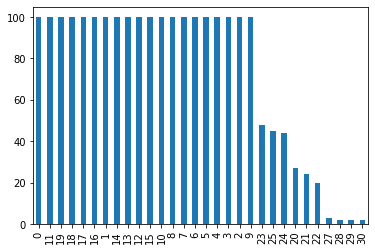

In [12]:
df_val_undersample = under_sample(df_val, max_no_rows=100)

In [13]:
SEED = 42 # use the same seed as in step 01
TEST_SIZE = 0.13 # use the same as in step 01
full_dataset = Dataset.from_pandas(df_train_undersample).train_test_split(test_size=TEST_SIZE, seed=SEED)
full_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 10616
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1587
    })
})

In [14]:
full_dataset["validation"] = Dataset.from_pandas(df_val_undersample)

In [15]:
full_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 10616
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1587
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2217
    })
})

## 5. Add Samples to Monirity Class
Using twitter and https://sentence.yourdictionary.com/flushed to get more examples

In [2]:
# 26
flushed = {
    "label" : 26,
    "text" : [
        "Why is Kylian Mbappe refusing a France squad photoshoot?",
        "Shoto senpai has noticed me",
        "His face was flushed and his eyes were bright.",
        "Her cheeks flushed hot with blood.",
        "She flushed despite herself. She was so embarassed.",
        "She stopped and glanced up at his flushed face.",
        "SMH… What the hell is wrong with people today",
        "This is still the cleanest robbery getaway I’ve ever seen",
        "Footage surfaces of August Alsina ignoring Tory Lanez and leaving him hanging.",
        "Your heart is broken but it's not bleeding. Weird",
        "I was kind of embarrassed about the money not coming in the mail like I said."
    ]
}



# 27
sarcasm = {
    "label" : 27,
    "text" : [
        "All right, I'll play your silly games.",
        "It was silly, but it was also fun.",
        "Claire thinks I'm a silly goose about it.",
        "Kara took the joke seriously because she was too credulous to understand the sarcasm.",
        "They do not read body language well and sarcasm is often misunderstood.",
        "It’s okay. I mean it’s not okay, but it’s okay.",
        "Stop pretending like you’re hiding your partner. You don’t have one.",
        "Need a sugar daddy that doesn’t want any sugar "
    ]
}

#28
depressed = {
    "label" : 28,
    "text" : [
        "This is uncomfortable to watch",
        "I was holding my breath ",
        "Man even slapped her hand out the way",
        "Nothing is more painful than being blocked by the person you are planning to block",
        "I want a sugar daddy ",
        "Why are you hurting a girl you begged to date",
        "I don't want to believe this",
        "Need her badly",
        "I'm feeling so sad right now",
        "I'm not feeling very well right now.",
        "This is so depressing",
    ]
}

#29
angry = {
    "label" : 29,
    "text" : [
        "This makes me so angry",
        "This makes me sick",
        "I could kill him right now",
        "this is degusting to watch",
        "stop texting mark!!",
        "Saying what make me angry ",
        "Should be arrested just for that kick",
        "hate when i compliment someone and they say “no that’s you”. ",
        "stfu and take the compliment ",
    ]
}

#30
see_no_evil = {
    "label" : 30,
    "text" : [
        "No panties, hot still?",
        "How long do you think these buttons will last?",
        "A picture speaks a thousand words ",
        "Most talented persons are in Pakistan",
        "Ladies out of 10, how many dates have you gone to, this month",
        "Hey Averyone can i send you pic like this? ",
        "How to unsee this?",
        "Need a midnight partner",
        "I'm so excited, I married my best friend",
        "Can I Follow you? ",
    ]
}

#31
dumb = {
    "label" : 31,
    "text" : [
        "But it is obvious to me that we can end war",
        "In that moment of obvious joy, Alondra barely had an accent.",
        "It was obvious that he didn't want to talk about his natural father.",
        "The answer was as obvious as it was embarrassing.",
        "It will be so obvious, even you will see it.",
        "More of that 'minority coalition'",
        "What's your plan B if nobody marries you ",
        "Why do men always want to apologize at night?",
        "Besides, she knows how dumb I am.",
        "Don't be so dumb.",
    ]
}
extra_samples = [flushed, sarcasm, depressed, angry, see_no_evil, dumb]
extra_samples_with_list_of_labels =  [{"label": [x["label"]]*len(x["text"]), "text":x["text"]} for x in extra_samples ]
extra_samples_with_list_of_labels

[{'label': [26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26],
  'text': ['Why is Kylian Mbappe refusing a France squad photoshoot?',
   'Shoto senpai has noticed me',
   'His face was flushed and his eyes were bright.',
   'Her cheeks flushed hot with blood.',
   'She flushed despite herself. She was so embarassed.',
   'She stopped and glanced up at his flushed face.',
   'SMH… What the hell is wrong with people today',
   'This is still the cleanest robbery getaway I’ve ever seen',
   'Footage surfaces of August Alsina ignoring Tory Lanez and leaving him hanging.',
   "Your heart is broken but it's not bleeding. Weird",
   'I was kind of embarrassed about the money not coming in the mail like I said.']},
 {'label': [27, 27, 27, 27, 27, 27, 27, 27],
  'text': ["All right, I'll play your silly games.",
   'It was silly, but it was also fun.',
   "Claire thinks I'm a silly goose about it.",
   'Kara took the joke seriously because she was too credulous to understand the sarcasm.',
   'They d

In [20]:
import pandas as pd
df_train = full_dataset["train"].to_pandas()
df_extra_samples = [pd.DataFrame(x) for x in extra_samples_with_list_of_labels ]

In [21]:
df_train.label.value_counts()

19    450
6     446
0     441
18    440
15    440
16    439
4     438
17    436
7     435
11    432
8     432
9     432
2     432
5     432
14    431
1     430
12    428
10    426
13    426
3     424
24    388
25    386
23    384
21    241
20    228
22    214
31     29
28     15
30     12
27     10
29     10
26      9
Name: label, dtype: int64

In [22]:
df_train_with_samples = pd.concat([df_train] + df_extra_samples)
df_train_with_samples.label.value_counts()

19    450
6     446
0     441
18    440
15    440
16    439
4     438
17    436
7     435
11    432
8     432
9     432
2     432
5     432
14    431
1     430
12    428
10    426
13    426
3     424
24    388
25    386
23    384
21    241
20    228
22    214
31     39
28     26
30     22
26     20
29     19
27     18
Name: label, dtype: int64

## 6. Push to Huggingface Hub.

In [23]:
full_dataset.push_to_hub("vincentclaes/emoji-predictor")

Pushing split train to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.8/site-packages/huggingface_hub/hf_api.py:2165: FutureWarning: `identical_ok` has no effect and is deprecated. It will be removed in 0.11.0.
  warnings.warn(


Deleting unused files from dataset repository:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing split test to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Deleting unused files from dataset repository:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing split validation to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Deleting unused files from dataset repository:   0%|          | 0/1 [00:00<?, ?it/s]